[Reference](https://medium.com/mlearning-ai/anomaly-detection-with-machine-learning-8fa942fb5adc)

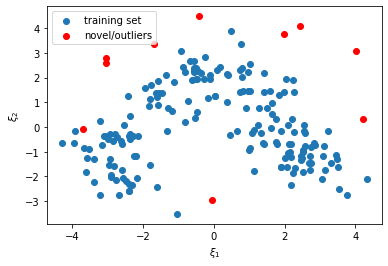

interactive(children=(FloatSlider(value=0.5, description='$\\nu$', max=0.99, min=0.01, step=0.01), Output()), …

interactive(children=(FloatSlider(value=0.1, description='fraction', max=0.5, min=0.01, step=0.01), Output()),…

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest
# load data set
data = load_wine()
X = data['data']

# truncate to two variables
pipe = Pipeline([('scaler', StandardScaler()), ('dim_red', PCA(n_components=2))])
Xt = pipe.fit_transform(X)

# generate novel/outlier points
np.random.seed(1)
theta = 2*np.pi*np.random.random(10)
X_test = np.vstack((4*np.cos(theta) + np.random.random(10), 4*np.sin(theta) + np.random.random(10)))

plt.scatter(*Xt.T)
plt.scatter(*X_test, c='red')
plt.xlabel('$\\xi_1$')
plt.ylabel('$\\xi_2$');
plt.legend(["training set", "novel/outliers"]);

from sklearn.svm import OneClassSVM
from ipywidgets import interact, FloatSlider

def plot_one_class_svm(X, X_test):
    def plotter(nu=0.95):
        clf = OneClassSVM(nu=nu, gamma='auto')
        clf.fit(X)
        y_pred = clf.predict(X)
        fp_rate = (y_pred == -1).sum()/len(X)
        
        X1, X2 = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
        y_proba = clf.decision_function(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))
        Z = y_proba.reshape(50, 50)
        
        fig = plt.figure(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
        plt.colorbar()
        a = plt.contour(X1, X2, Z, levels=[0], linewidths=2, colors='black')            
        b1 = plt.scatter(*X.T, c='blue')
        b2 = plt.scatter(*X_test, c='red')
        plt.title("false positive rate: {:g}".format(fp_rate))
        plt.legend([a.collections[0], b1, b2], ["boundary", " true inliers", "true outliers"], frameon=True, 
                   loc="lower left")
    return plotter

nu_slider = FloatSlider(min=0.01, max=0.99, step=0.01, value=0.5, description='$\\nu$')
interact(plot_one_class_svm(Xt, X_test), nu=nu_slider);

def plot_isolation_forest(X, X_test):
    def plotter(contamination=0.2):
        clf = IsolationForest(n_estimators=100, contamination=contamination)
        clf.fit(X)
    
        y_pred = clf.predict(X)
        outlier_rate = (y_pred == -1).sum()/len(X)
        
        X1, X2 = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
        y_proba = clf.decision_function(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))
        Z = y_proba.reshape(50, 50)
        
        fig = plt.figure(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.contourf(X1, X2, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
        plt.colorbar()
        a = plt.contour(X1, X2, Z, levels=[0], linewidths=2, colors='black')            
        b1 = plt.scatter(*X.T, c='blue')
        b2 = plt.scatter(*X_test, c='red')
        plt.title("outlier fraction: {:g}".format(outlier_rate))
        plt.legend([a.collections[0], b1, b2], ["boundary", " true inliers", "true outliers"], frameon=True, 
                   loc="lower left")    
    return plotter

cont_slider = FloatSlider(min=0.01, max=0.5, value=0.1, step=0.01, description="fraction")
interact(plot_isolation_forest(Xt, X_test), contamination=cont_slider);